# Binary Classification using Keras ANN on Churn Modelling dataset from Kaggle; courtesy Krish Naik

In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('/home/sandeep/Development/Datasets/Retail/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.iloc[:,13].unique()

array([1, 0])

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [8]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train, X_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
         -0.57369368,  0.91601335],
        [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
         -0.57369368,  0.91601335],
        [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
         -0.57369368, -1.09168714]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
         -0.57369368, -1.09168714],
        [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ..., -

In [13]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sandeep/

In [14]:
# Initialising the ANN
classifier = Sequential()

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
classifier.weights

[<tf.Variable 'dense_1/kernel:0' shape=(11, 6) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(6,) dtype=float32>]

In [17]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [18]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
classifier.weights

[<tf.Variable 'dense_1/kernel:0' shape=(11, 6) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(6,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(6, 6) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(6,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(6, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32>]

In [21]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, nb_epoch = 100)

In [47]:
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


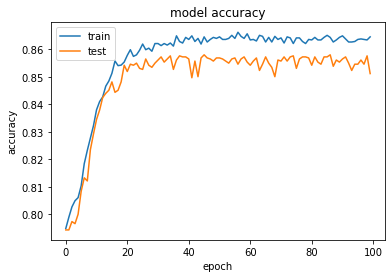

In [48]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

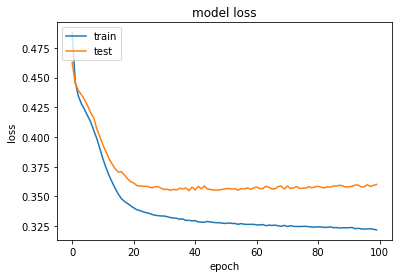

In [49]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [52]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [53]:
cm

array([[1531,   64],
       [ 206,  199]])

In [54]:
score

0.865